In [1]:
%matplotlib inline
import seaborn as sns # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

## Load Dataset

In [2]:
train = pd.read_csv("data/titanic/train.csv", \
                    index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seaborn

### countplot

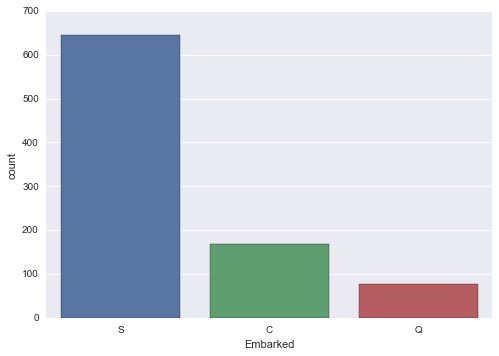

In [3]:
sns.countplot(data=train, x="Embarked")

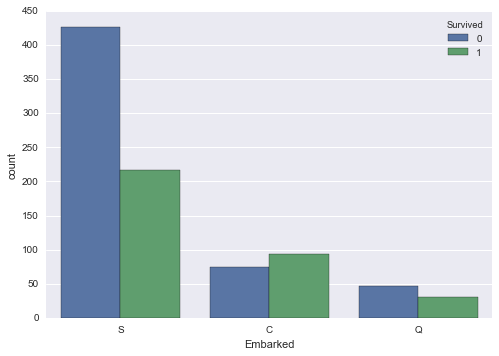

In [4]:
sns.countplot(data=train, x="Embarked", hue="Survived")

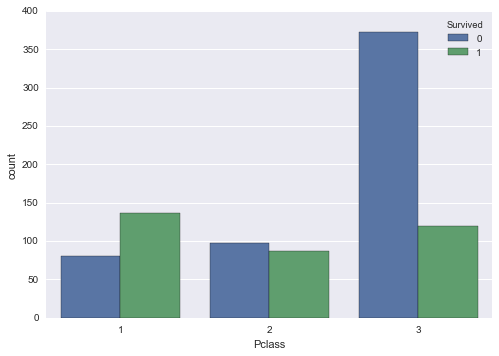

In [5]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### Barplot

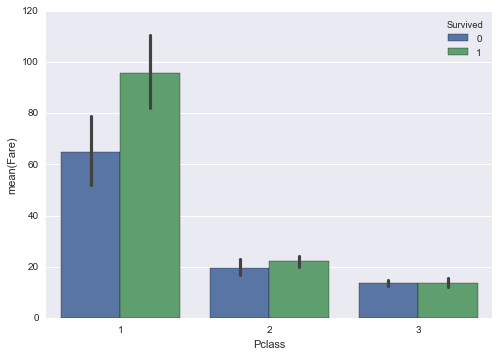

In [6]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### distplot

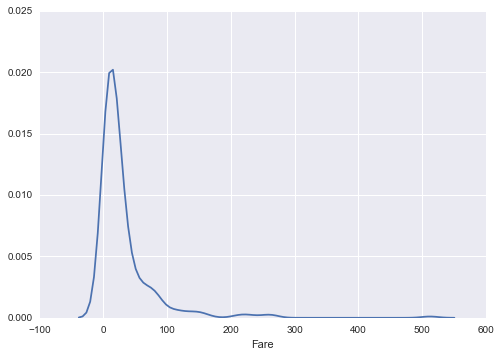

In [7]:
sns.distplot(train["Fare"], hist=False)

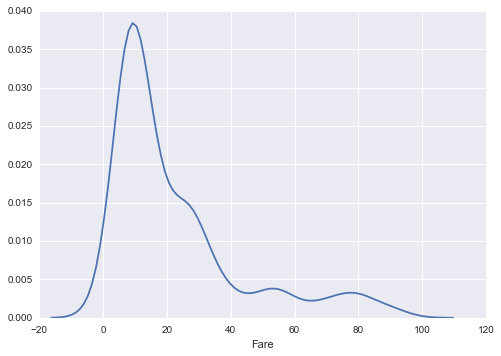

In [8]:
ignore_high_fare = train[train["Fare"] < 100]

sns.distplot(ignore_high_fare["Fare"], hist=False)

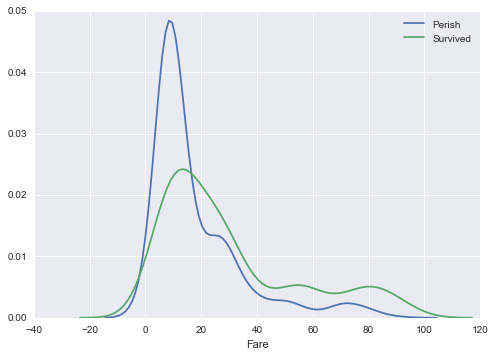

In [9]:
ignore_high_fare = train[train["Fare"] < 100]

perish = ignore_high_fare[ignore_high_fare['Survived'] == 0]
survived = ignore_high_fare[ignore_high_fare["Survived"] == 1]

sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

# lmplot

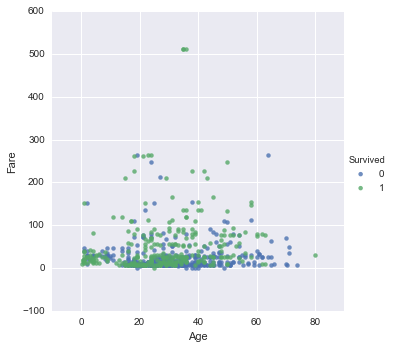

In [10]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

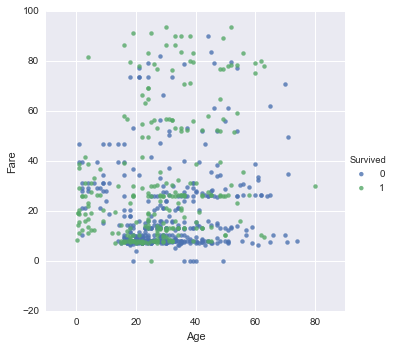

In [11]:
ignore_high_fare = train[train["Fare"] < 100]

sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", \
           hue="Survived", fit_reg=False)

### subplots

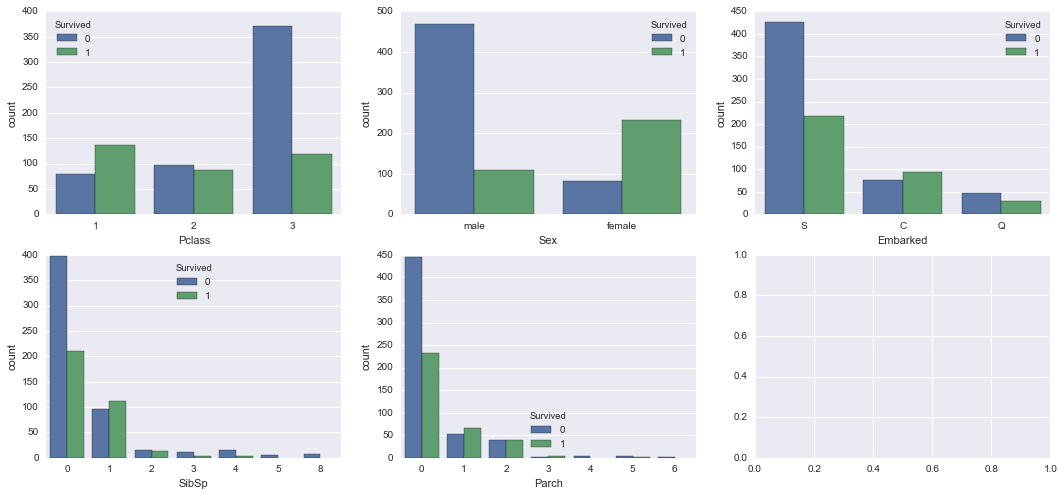

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
    plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)

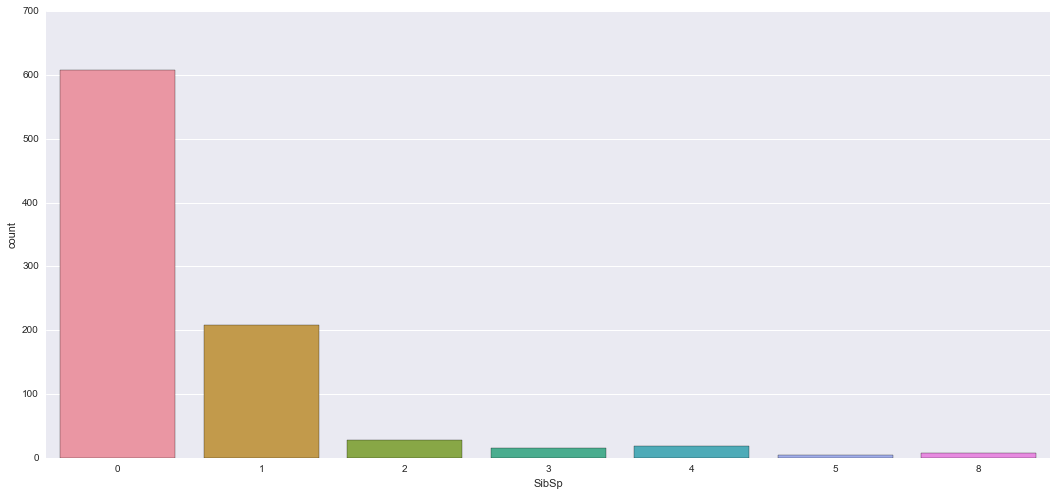

In [13]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

sns.countplot(data=train, x="SibSp", ax=ax)

In [14]:
def find_title(name):
    return name.split(", ")[1].split(". ")[0]

train["Title"] = train["Name"].apply(find_title)

print(train.shape)
train[["Name", "Title"]].head()

(891, 12)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


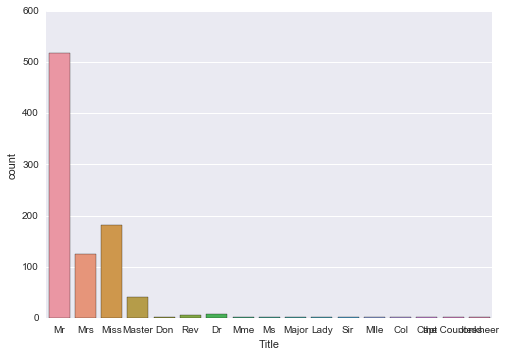

In [15]:
# x축의 label이 겹쳐 보인다. (ex: Capt, The ountess, Jonkheer)
sns.countplot(data=train, x="Title")

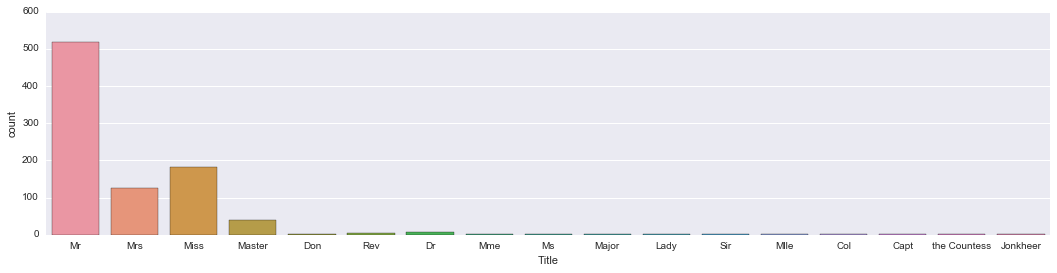

In [16]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.countplot(data=train, x="Title", ax=ax)

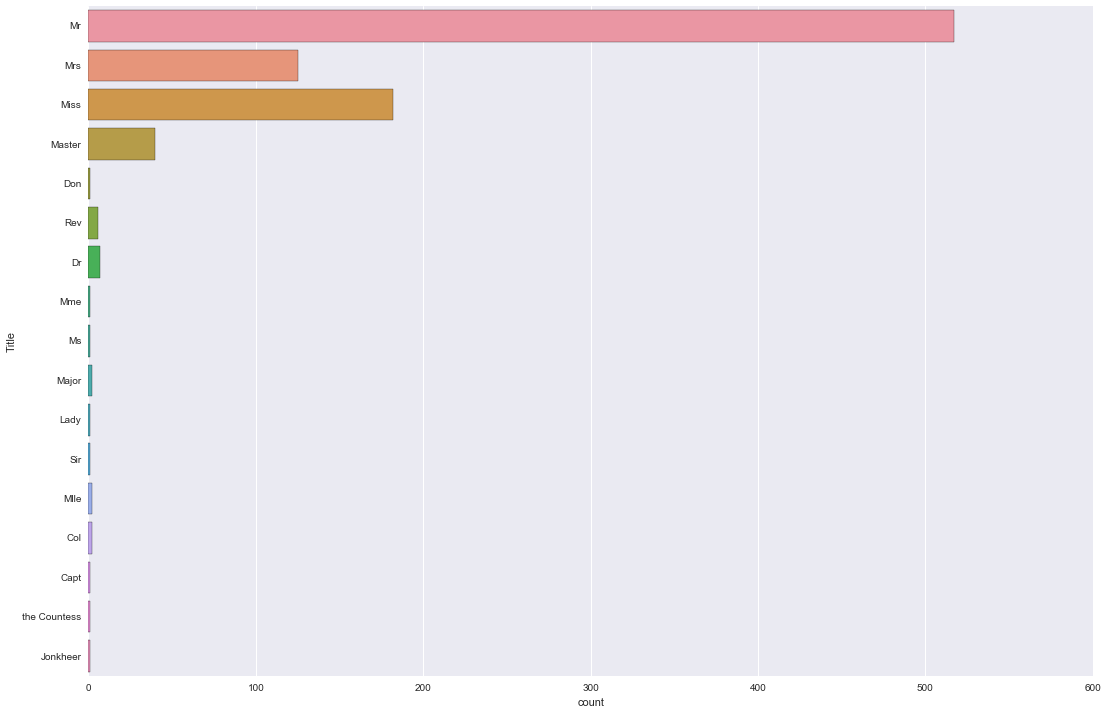

In [17]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 12)

sns.countplot(data=train, y="Title", ax=ax)